En aquest DATASET tractarem de fer un peitit estudi exploratori de les dades abans d'entrar en els específics dels apartats per a entendre el màxim possible amb quin tipús de dades tractem

## Dades introductores

In [1]:
# Llegim les dades del dataframe y preparem la columna date correctament

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

In [22]:
region_classification = {
'Albany': 'City',
'Atlanta': 'City',
'BaltimoreWashington': 'Region',
'Boise': 'City',
'Boston': 'City',
'BuffaloRochester': 'Region',
'California': 'GreaterRegion',
'Charlotte': 'City',
'Chicago': 'City',
'CincinnatiDayton': 'Region',
'Columbus': 'City',
'DallasFtWorth': 'Region',
'Denver': 'City',
'Detroit': 'City',
'GrandRapids': 'City',
'GreatLakes': 'GreaterRegion',
'HarrisburgScranton': 'Region',
'HartfordSpringfield': 'Region',
'Houston': 'City',
'Indianapolis': 'City',
'Jacksonville': 'City',
'LasVegas': 'City',
'LosAngeles': 'City',
'Louisville': 'City',
'MiamiFtLauderdale': 'Region',
'Midsouth': 'GreaterRegion',
'Nashville': 'City',
'NewOrleansMobile': 'Region',
'NewYork': 'City',
'Northeast': 'GreaterRegion',
'NorthernNewEngland': 'Region',
'Orlando': 'City',
'Philadelphia': 'City',
'PhoenixTucson': 'Region',
'Pittsburgh': 'City',
'Plains': 'GreaterRegion',
'Portland': 'City',
'RaleighGreensboro': 'Region',
'RichmondNorfolk': 'Region',
'Roanoke': 'City',
'Sacramento': 'City',
'SanDiego': 'City',
'SanFrancisco': 'City',
'Seattle': 'City',
'SouthCarolina': 'State',
'SouthCentral': 'GreaterRegion',
'Southeast': 'GreaterRegion',
'Spokane': 'City',
'StLouis': 'City',
'Syracuse': 'City',
'Tampa': 'City',
'TotalUS': 'TotalUS',
'West': 'GreaterRegion',
'WestTexNewMexico': 'Region'
}

classification_colors = {'City':'green' ,'Region':'yellow' ,'GreaterRegion':'orange', 'State':'red'}

df_cp['region_class']= df_cp['region'].map(region_classification)

### EDA

/tmp/ipykernel_72010/1164711967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_cleaned['Suma Volums'] = df_cp_cleaned['Volume_Hass_S' ]+ df_cp_cleaned['Volume_Hass_L']+ df_cp_cleaned['Volume_Hass_XL' ]
/tmp/ipykernel_72010/1164711967.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_cleaned['Variacio'] = (df_cp_cleaned['Total Volume'] - df_cp_cleaned['Suma Volums'])*100/df_cp_cleaned['Total Volume']


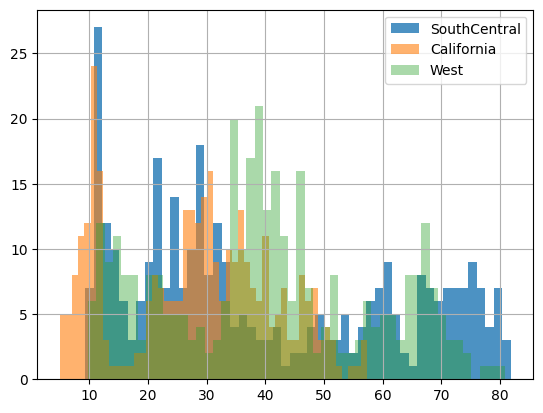

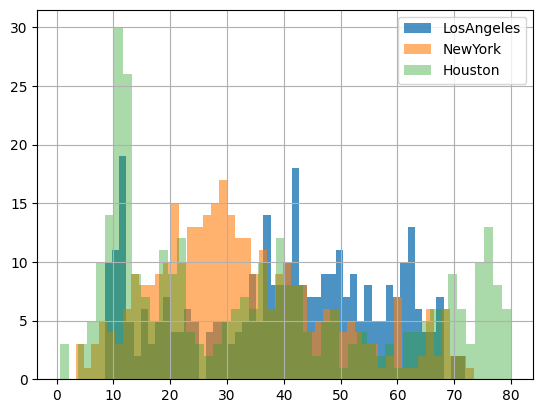

In [32]:

df_cp = df_cp.rename(columns={df.columns[0]: 'Col_0'}) # Primera columna sin titulo, potencialmente eliminable
df_cp = df_cp.rename(columns={'4046': 'Volume_Hass_S'}) # Etiquetas mas descritivas
df_cp = df_cp.rename(columns={'4225': 'Volume_Hass_L'})
df_cp = df_cp.rename(columns={'4770': 'Volume_Hass_XL'})
df_cp_cleaned = df_cp.drop('Col_0', axis=1) # Parecen IDs del 0 al 52. Eliminable. # Col_0 = df_cp['Col_0'].unique()  print(f"Col_0: {Col_0}\n")
df_cp_cleaned = df_cp[df_cp.region != 'TotalUS'] # Para seleccionar unicamente las regiones propias , descartamos Total US para la vista gráfica

df_cp_cleaned['Suma Volums'] = df_cp_cleaned['Volume_Hass_S' ]+ df_cp_cleaned['Volume_Hass_L']+ df_cp_cleaned['Volume_Hass_XL' ]
df_cp_cleaned['Variacio'] = (df_cp_cleaned['Total Volume'] - df_cp_cleaned['Suma Volums'])*100/df_cp_cleaned['Total Volume']


df_cp_cleaned_city = df_cp_cleaned[df_cp_cleaned['region_class']=='City']
region_largest= df_cp_cleaned_city.groupby('region')['Total Volume'].sum().nlargest(3).index



transparencia = 1
for region in ['SouthCentral', 'California', 'West']:#, 'TotalUS']:#.nlargest(6)
    transparencia-=0.2

    df_cp_temp = df_cp_cleaned[df_cp_cleaned['region'] ==region]
    df_cp_temp['Variacio'].hist(bins=50, label=str(region), alpha = transparencia)
    plt.legend(loc='best')

plt.show()

transparencia = 1
for region in ['LosAngeles', 'NewYork', 'Houston']:#, 'TotalUS']:#.nlargest(6)
    transparencia-=0.2

    df_cp_temp = df_cp_cleaned[df_cp_cleaned['region'] ==region]
    df_cp_temp['Variacio'].hist(bins=50, label=str(region), alpha = transparencia)
    plt.legend(loc='best')

plt.show()

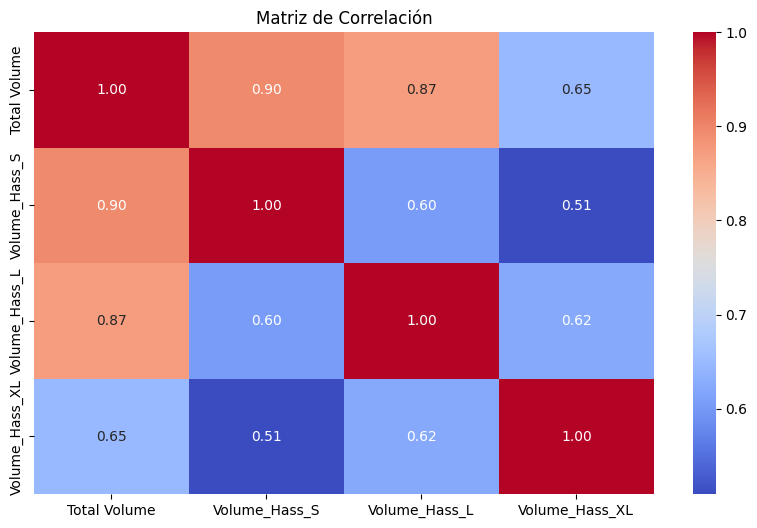

Variables altamente correlacionadas con otras: ['Total Volume', 'Volume_Hass_S', 'Volume_Hass_L']


In [35]:

corr_df= df_cp_cleaned[['Total Volume', 'Volume_Hass_S', 'Volume_Hass_L', 'Volume_Hass_XL']]
# Calcular la matriz de correlación
corr_matrix = corr_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Identificar columnas con correlación alta (umbral = 0.8)
threshold = 0.8
to_drop = []
for column in corr_matrix.columns:
    if any((corr_matrix[column].abs() > threshold) & (corr_matrix.index != column)):
        to_drop.append(column)
        
print(f"Variables altamente correlacionadas con otras: {to_drop}")

In [3]:
smallest_regions= df_cp_cleaned[df_cp_cleaned['region'].isin(region_largest) ]
small_group = df_cp_cleaned.groupby('region')['Variacio'].mean().sort_values()
small_group

region
SanFrancisco            9.955330
Sacramento             11.691686
Chicago                11.763706
SanDiego               24.562791
PhoenixTucson          25.091574
California             27.893113
HartfordSpringfield    31.802313
NewYork                33.026166
LasVegas               33.643763
Charlotte              34.138870
GrandRapids            34.893758
GreatLakes             35.297427
Atlanta                35.354104
WestTexNewMexico       35.650211
BaltimoreWashington    35.874110
Houston                36.019133
Plains                 36.695516
DallasFtWorth          37.400859
RaleighGreensboro      38.106545
Spokane                38.631778
RichmondNorfolk        39.126347
Columbus               39.384025
LosAngeles             39.535156
Midsouth               39.536758
SouthCentral           39.728916
West                   40.108429
SouthCarolina          40.156343
Nashville              40.208491
Southeast              42.267471
Detroit                42.396954
Jac

In [4]:
grouper = df_cp_cleaned.groupby('region')['Total Volume'].sum().nlargest(10).index


<Axes: >

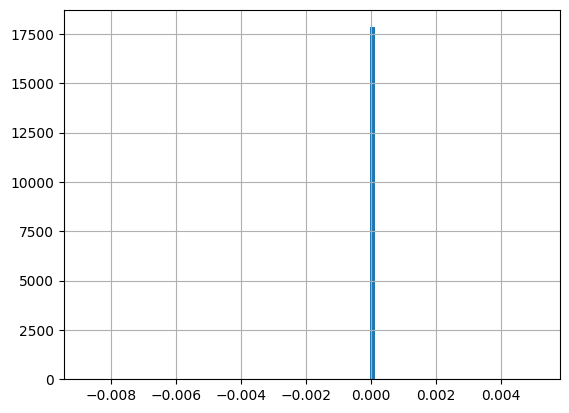

In [43]:
bags_df = df_cp_cleaned.copy()
bags_df['Suma Bags'] = bags_df['Small Bags']+ bags_df['Large Bags']+ bags_df['XLarge Bags']
bags_df['Variacio Bags'] = (bags_df['Total Bags'] - bags_df['Suma Bags'])*100/bags_df['Total Bags']
bags_df['Variacio Bags'].hist(bins=100)

In [6]:
df_cp.head()

,Col_0,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_class
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City


In [7]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Col_0           18249 non-null  int64         
 1   Date            18249 non-null  datetime64[ns]
 2   AveragePrice    18249 non-null  float64       
 3   Total Volume    18249 non-null  float64       
 4   Volume_Hass_S   18249 non-null  float64       
 5   Volume_Hass_L   18249 non-null  float64       
 6   Volume_Hass_XL  18249 non-null  float64       
 7   Total Bags      18249 non-null  float64       
 8   Small Bags      18249 non-null  float64       
 9   Large Bags      18249 non-null  float64       
 10  XLarge Bags     18249 non-null  float64       
 11  type            18249 non-null  object        
 12  year            18249 non-null  int64         
 13  region          18249 non-null  object        
 14  region_class    18249 non-null  object        
dtypes:

In [8]:
df_cp.describe()

,Col_0,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
min,0.000000,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938


Ara que tenim una idea de les dades, tractem de veure que podem treure a trets generals de la informacio. Quines son les variables més importants, efectives...

## Primers gràfics

### Estudi per tipus de alvocats

<Axes: xlabel='year,type'>

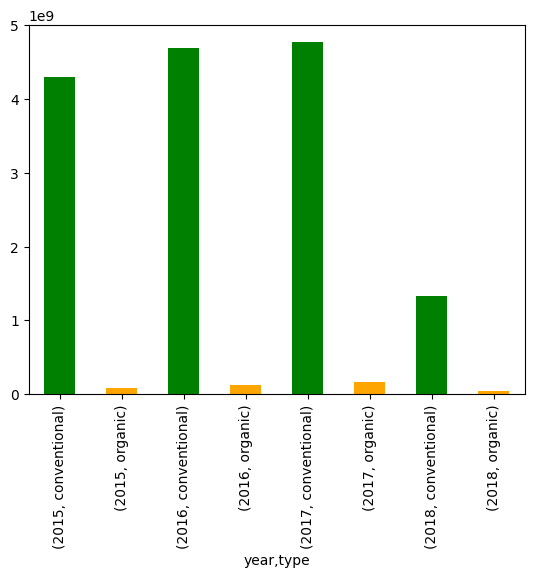

In [9]:
# Aqui es veu clarament que el alvocat més relevant es el convencional per ordres de magnitud, per ho que seria relevant 
# fer algún estudi del subset eliminant els organics o estudian-los per separat.
# Addicionalment, l'any 2018 no esta complert, pot afectar a les dades.

grouped = df_cp.groupby(['year', 'type'])['Total Volume'].sum()
grouped.plot(kind='bar', color=['g', 'orange'] )

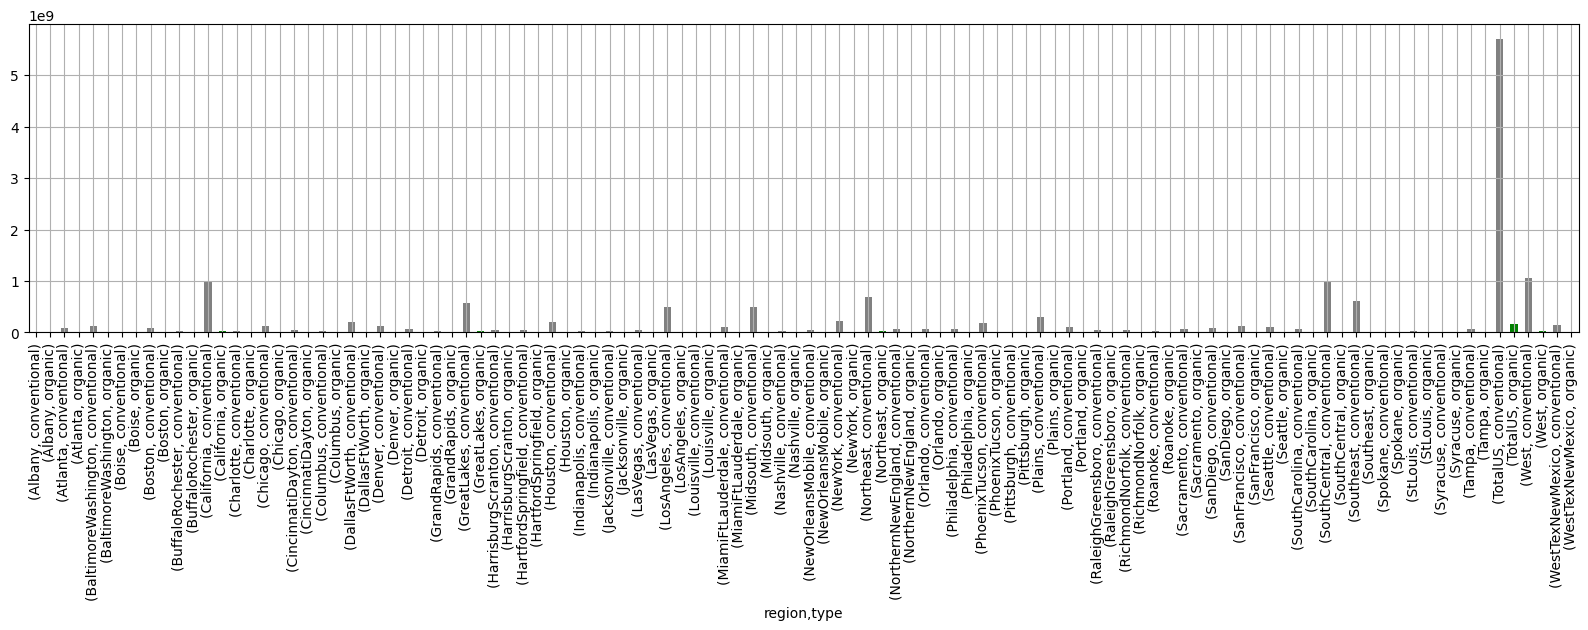

In [10]:
# Aqui veiem que existeixen unes regions mes relevants que altres. Caldria fer una separació?

df_subset = df_cp#[df_cp['region']!= 'TotalUS']
pd.unique(df_subset['region'])

grouped = df_subset.groupby(['region', 'type'])['Total Volume'].sum()

fig, ax= plt.subplots(figsize=(20,4))
grouped.plot(kind='bar', ax=ax, color = ['gray', 'green'] )
# plt.ylim(0, 0.3*10**9)
plt.grid()


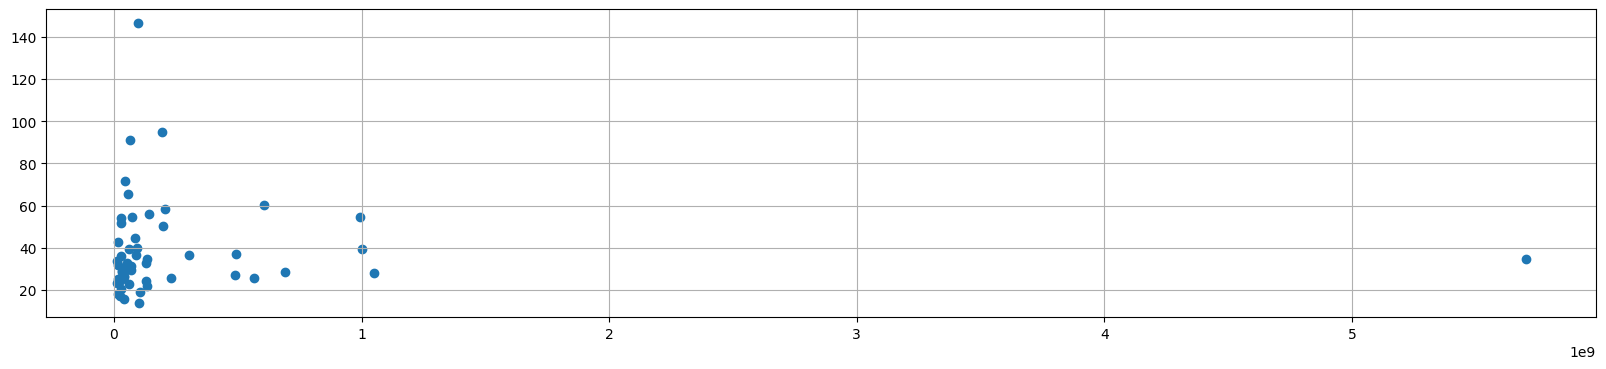

In [14]:
# Si mirem la proporcio, en general es manté constant. No hi ha ningun interes per a tornar a ho natural a les gran ciutats o 
# extensions.
# Si acas hi ha més divergencia en extensions menors.

unstacked_type= grouped.unstack()

unstacked_type['Proportion'] = unstacked_type['conventional']/unstacked_type['organic']

fig, ax= plt.subplots(figsize=(20,4))
x_values= unstacked_type['conventional']
y_values= unstacked_type['Proportion']

ax.scatter(x=x_values, y= y_values )
# plt.ylim(0, 0.3*10**9)
plt.grid()


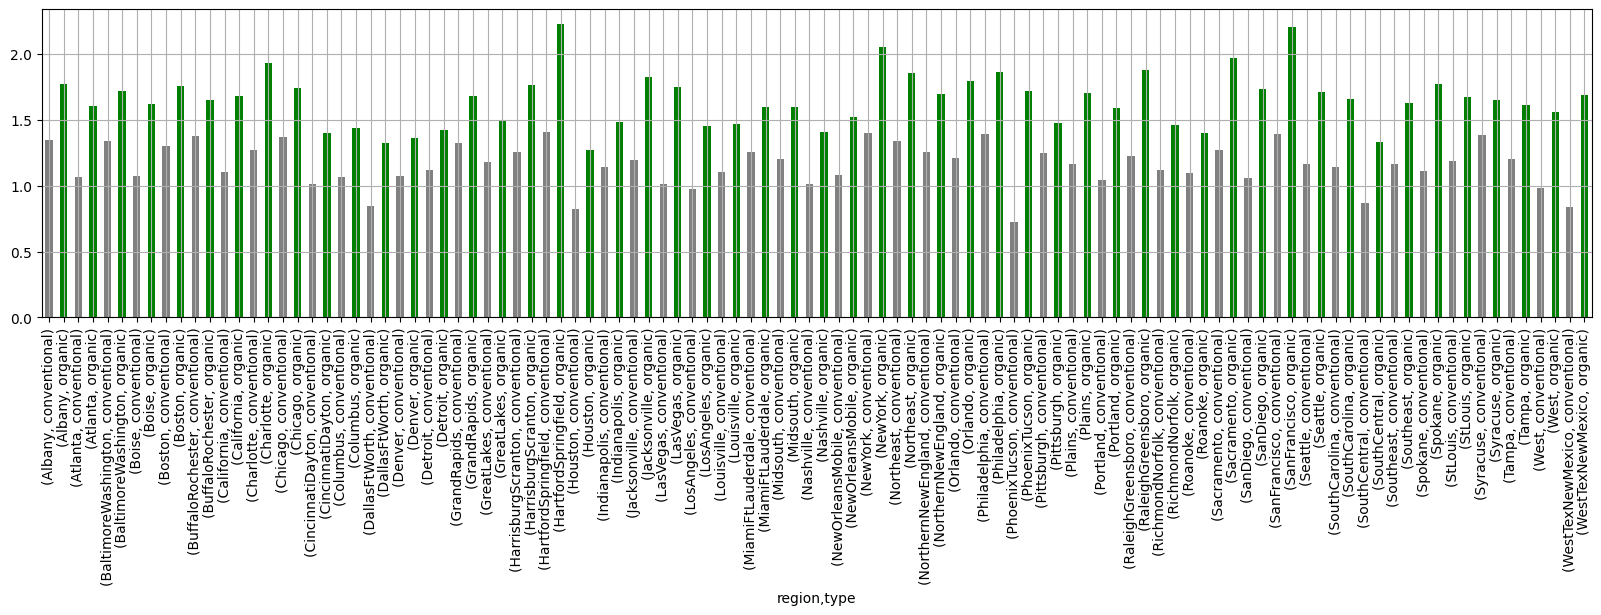

In [45]:
price_group = df_subset.groupby(['region', 'type'])['AveragePrice'].mean()

fig, ax= plt.subplots(figsize=(20,4))
price_group.plot(kind='bar', ax=ax, color = ['gray', 'green'] )
# plt.ylim(0, 0.3*10**9)
plt.grid()

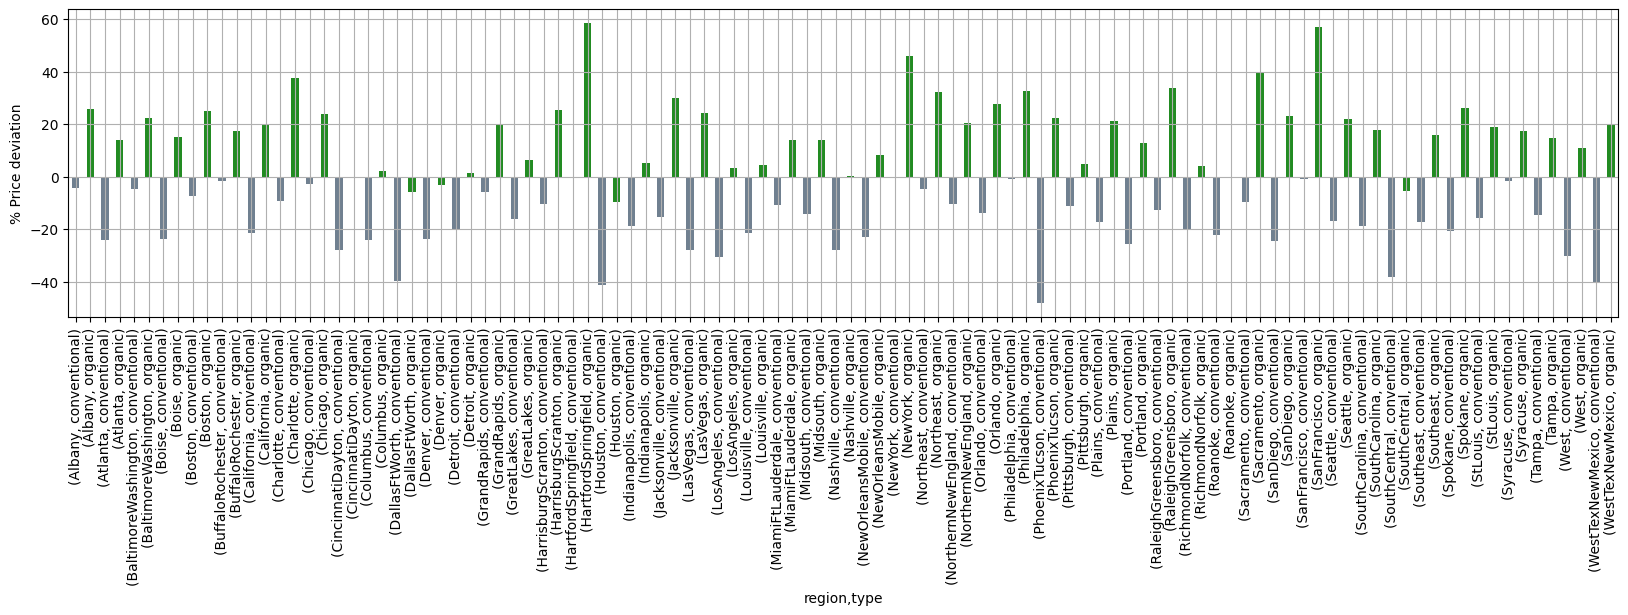

In [46]:
## Aquest gràfic es espectacular, y ens permet veure que sempre són els alvocats orgànics els que costen més que la mitjana.

avocados_region_mean = df_subset.groupby(['region','type'])['AveragePrice'].mean()#.nlargest(6)

total_mean = df_subset['AveragePrice'].mean()
fig, ax= plt.subplots(figsize=(20,4))
avocados_relative_mean = (avocados_region_mean - total_mean)*100/total_mean
avocados_relative_mean.plot(kind = 'bar', ylabel= '% Price deviation', color = ['slategray', 'forestgreen'])
plt.grid()

### Subset alvocados convencionals

In [ ]:
# Aqui tendriamos que incluir una idea de si todas las regiones hacen un número similar total de pedidos

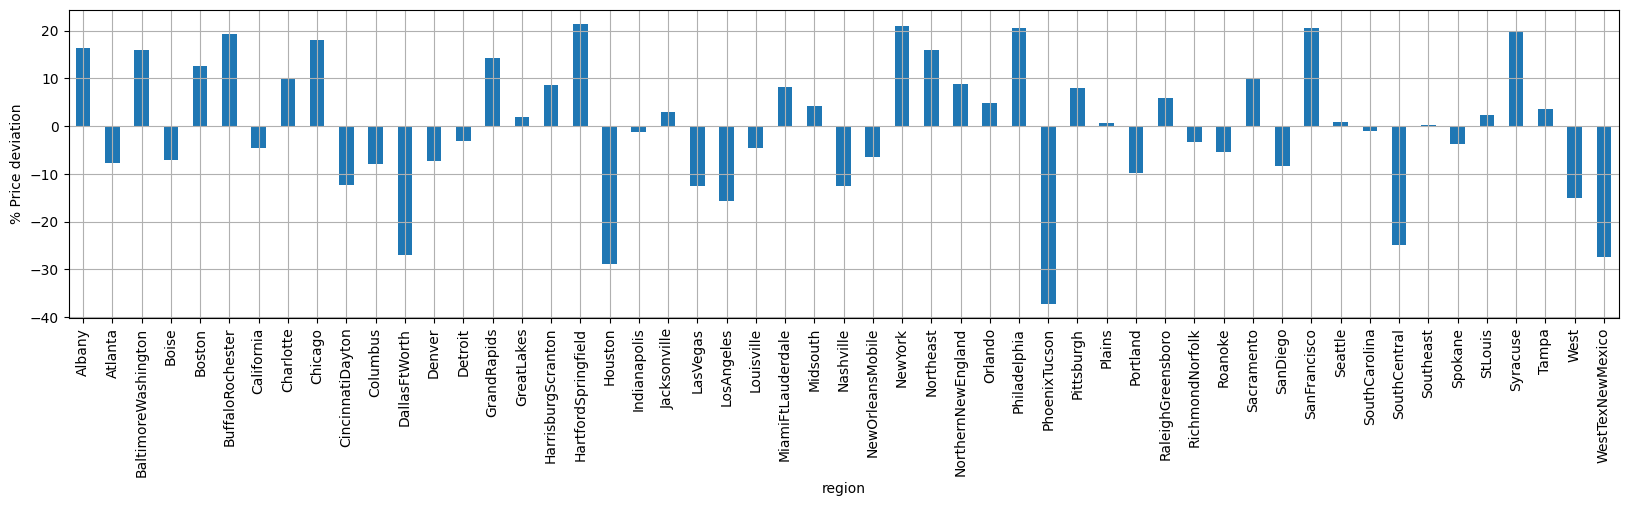

In [48]:
# Claramente hay sitios donde los aguacates son más baratos, miremos si tiene que ver con otras características
df_subset = df_cp[df_cp['region']!= 'TotalUS']
df_convencionals = df_subset[df_subset['type']=='conventional']

# df_convencionals

convencional_region_mean = df_convencionals.groupby('region')['AveragePrice'].mean()#.nlargest(6)
coloring=convencional_region_mean.index.map(region_classification).map(classification_colors)
total_mean = df_convencionals['AveragePrice'].mean()
fig, ax= plt.subplots(figsize=(20,4))
avocados_relative_mean = ((convencional_region_mean - total_mean)*100/total_mean)
avocados_relative_mean.plot(kind = 'bar', ylabel= '% Price deviation')#, color= coloring)#, color= convencional_region_mean.index.map(classification_colors))
plt.grid()

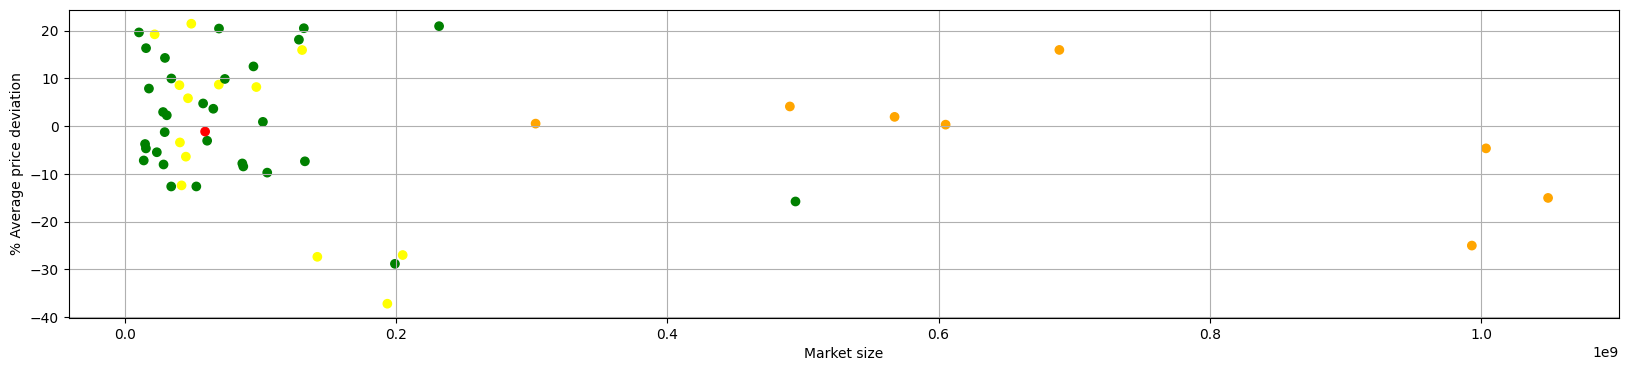

In [49]:
# Aqui podem veure que a majors mercats el preu mig tendeix a abaratirse. Aqui estem prenent cada regio com equivalentment valida
# cambiar el 2018 no parece afectar los resultados
convencional_region_mean_total = df_convencionals.groupby('region').agg({'Total Volume':'sum', 'AveragePrice':'mean'})#.nlargest(6)

convencional_region_mean_total['region_class'] = convencional_region_mean_total.index.map(region_classification)

fig, ax= plt.subplots(figsize=(20,4))
x_values = convencional_region_mean_total['Total Volume']
total_mean = convencional_region_mean_total['AveragePrice'].mean()
y_values = (convencional_region_mean_total['AveragePrice'] - total_mean)*100/total_mean
c_values= convencional_region_mean_total['region_class'].map(classification_colors)

plt.scatter(x= x_values, y= y_values, c=c_values)
plt.ylabel('% Average price deviation')
plt.xlabel('Market size')
plt.grid()

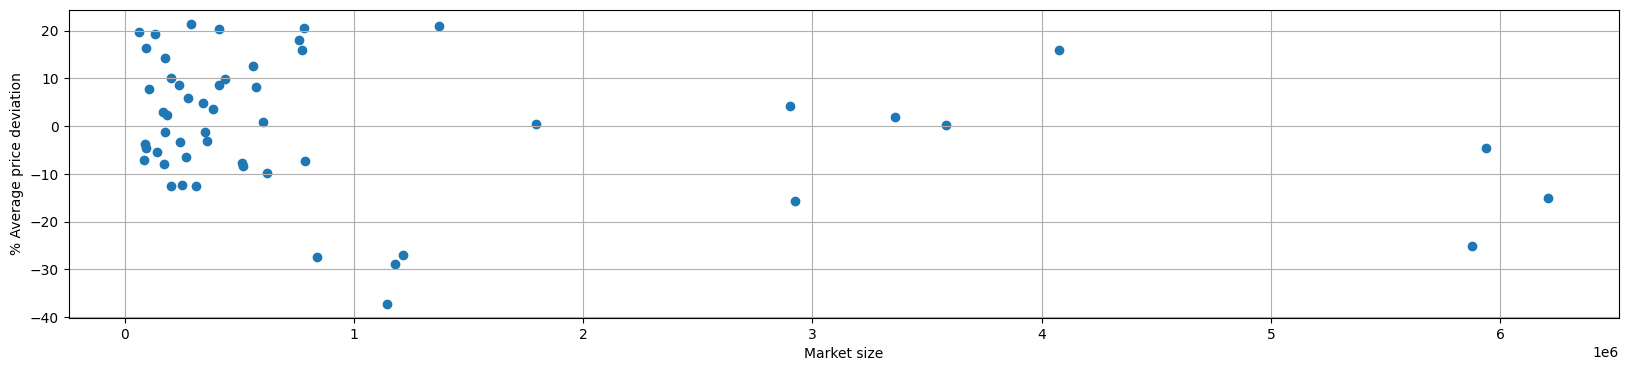

In [51]:
convencional_region_mean_total = df_convencionals.groupby('region').agg({'Total Volume':'mean', 'AveragePrice':'mean'})#.nlargest(6)
convencional_region_mean_total['region_class'] = convencional_region_mean_total.index.map(region_classification)

classification_colors = {'City':'green' ,'Region':'yellow' ,'GreaterRegion':'orange', 'State':'red'}


fig, ax= plt.subplots(figsize=(20,4))
x_values = convencional_region_mean_total['Total Volume']
total_mean = df_convencionals['AveragePrice'].mean()
y_values = (convencional_region_mean_total['AveragePrice'] - total_mean)*100/total_mean
c_values= convencional_region_mean_total['region_class'].map(classification_colors)


plt.scatter(x= x_values, y= y_values)
plt.ylabel('% Average price deviation')
plt.xlabel('Market size')
plt.grid()